In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# IMPORTING THE TOOLS WHICH  REQUERED FOR SOLVING PROBLEM

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

HERE IMPORTING  THE DATASET FORM THE DESKTOP 

In [3]:
os.getcwd()

'C:\\Users\\Lenovo'

In [4]:
os.chdir('C:\\Users\\Lenovo\\Downloads\\customer_personality')

In [5]:
df=pd.read_csv('marketing.csv')

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.shape

(2240, 29)

TOTAL NUMBER OF NULL VALUES IN THE DATASET

In [8]:
df.isnull().sum().sum()

24

In [9]:
#total number of columns in hole dataset
column=df.columns

we must understand the dataset, for understanding  we must categories dataset based on numberical data ,categorical data and year data. 


In [10]:
#here extract the columns which contian numerical values
numerical_colun=[feature for feature in column if df[feature].dtype != 'O']


In [11]:
#how many columns containg numerical values
len(numerical_colun)

26

In [12]:
#printing the column name which cantain numerical values
numerical_colun

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [13]:
df[numerical_colun].head()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [14]:
#here we are extracting the date and year column from the datset
year_feature = [feature for feature in df if 'Dt' in feature or 'Year' in feature]
len(year_feature)
    

2

In [15]:
df[year_feature].head()

,Year_Birth,Dt_Customer
0,1957,04-09-2012
1,1954,08-03-2014
2,1965,21-08-2013
3,1984,10-02-2014
4,1981,19-01-2014


In [16]:
#here extracting the which column haveing the alphabetic or charactare datatype 
categorical_col=[cname for cname in df.columns if df[cname].dtypes=='object']
len(categorical_col)

3

In [17]:
#finding which column having te null value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [18]:
#handaling the missing value by replaysing the null value with mean value of the column
df['Income']=df['Income'].fillna(df['Income'].mean())

In [19]:
df.isnull().sum().sum()

0

In [20]:
#here creating the new column 'age' by subracting the current year and year of birth  it helps to understand way
df['age']=2015-df['Year_Birth']

In [21]:
#in the above we create the sapporet column age because of that we not requer year_birth column so that we droping  that column
df.drop(['Year_Birth'],axis=1,inplace=True)

In [22]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,58
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,61
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,50
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,31
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,34


In [23]:
#here we find the unique elements in the column Education
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [24]:
df['Education']=df['Education'].replace({'Basic':'UnderGraduation','2n Cycle':'UnderGraduation'})

In [25]:
df['Education'].value_counts()

Graduation         1127
PhD                 486
Master              370
UnderGraduation     257
Name: Education, dtype: int64

In [26]:
#here we find the unique elements in the column marital_Status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [27]:
df['Marital_Status'].replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'},inplace=True)

In [28]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [29]:
#this column there is no different element  it have only element is 3 
#so this column is useful for further process because of that drop that column 
df.drop(['Z_CostContact'],axis=1,inplace=True)

In [30]:
#this column there is no different element  it have only element is 11 
#so this column is useful for further process because of that drop that column 
df.drop(['Z_Revenue'],axis=1,inplace=True)

In [31]:
df.shape

(2240, 27)

AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Respones this are all column contain only 0s and 1s value because of that we are adding those columns

In [32]:
df['Total_accepted']=df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp1']+df['AcceptedCmp2']+df['Response']

In [33]:
df['Total_accepted']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: Total_accepted, Length: 2240, dtype: int64

In [34]:
#we combine below all feature so it is not requare for further operation so we want eo drop those feture
drop=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']
df.drop(drop,axis=1,inplace=True)

In [35]:
#We see that "Dt_Customer" is in object data type so will convert it to date time.
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

In [36]:
df['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

we run simple For-Loops to subtract the registration date of each customer from the max date to find the days a customer has been registered with the business

In [37]:
datelist = []
for i in df['Dt_Customer']:
    datelist.append(i.date())

duration_list = []
for i in df['Dt_Customer']:
    duration_list.append(max(datelist) - i.date())
    
df['dayscustomerfor'] = duration_list

In [38]:
df['dayscustomerfor'].head()

0   663 days
1   113 days
2   312 days
3   139 days
4   161 days
Name: dayscustomerfor, dtype: timedelta64[ns]

now we have to classify the customer based on thir rigstration date wather a customer is old or new

In [39]:
df['dayscustomerfor'] = df['dayscustomerfor'].apply(lambda x: int(str(x).split(" ")[0]))

In [40]:
df['dayscustomerfor']

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: dayscustomerfor, Length: 2240, dtype: int64

In [41]:
df['dayscustomerfor'].describe()

count    2240.000000
mean      353.582143
std       202.122512
min         0.000000
25%       180.750000
50%       355.500000
75%       529.000000
max       699.000000
Name: dayscustomerfor, dtype: float64

C:\Users\Lenovo\anaconda3\envs\customer_personality_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dayscustomerfor', ylabel='Density'>

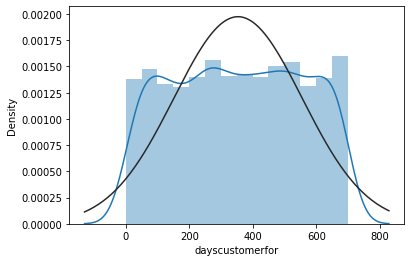

In [42]:
from scipy import stats
from scipy.stats import norm

sns.distplot(df['dayscustomerfor'] , fit = norm)

In [43]:
#using hypothesis testing we categaraise  customer into new and old customer
new=df['dayscustomerfor']<=df['dayscustomerfor'].quantile(0.3)
old=df['dayscustomerfor']>df['dayscustomerfor'].quantile(0.3)
df.loc[new, 'Cust_Seniority'] = "New"
df.loc[old, 'Cust_Seniority'] = "Old"
df['Cust_Seniority'].value_counts()

Old    1566
New     674
Name: Cust_Seniority, dtype: int64

In [44]:
#creating a new column by collecting new and old customer data
df['Cust_Seniority'].head()

0    Old
1    New
2    Old
3    New
4    New
Name: Cust_Seniority, dtype: object

In [45]:
df.shape

(2240, 25)

In [46]:
#collecting all types of product buying by the customer 
total_item = [feature for feature in df if 'Mnt' in feature]
len(total_item)


6

In [47]:
df[total_item].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [48]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'age',
       'Total_accepted', 'dayscustomerfor', 'Cust_Seniority'],
      dtype='object')

In [49]:
df[total_item].sum()

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

here we combine all product which are buing by the customer it helps to build a model ,it also gives customer relationship with company

In [50]:
df['total_item']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [51]:
df['total_item'].head()

0    1617
1      27
2     776
3      53
4     422
Name: total_item, dtype: int64

In [52]:
df['total_item'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: total_item, dtype: float64

In [53]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [54]:
drop=['Kidhome','Teenhome']
df.drop(drop,axis=1,inplace=True)

In [55]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

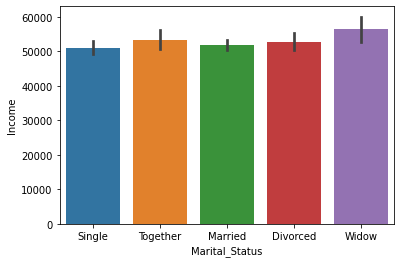

In [56]:
sns.barplot(x='Marital_Status',y='Income',data=df)
plt.show()

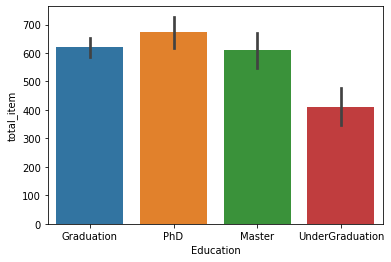

In [57]:
sns.barplot(x='Education',y='total_item',data=df)
plt.show()

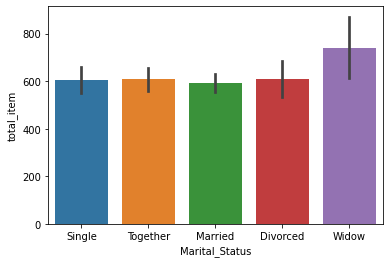

In [58]:
sns.barplot(x='Marital_Status',y='total_item',data=df)
plt.show()

In [59]:
df = df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [60]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'age',
       'Total_accepted', 'dayscustomerfor', 'Cust_Seniority', 'total_item',
       'Children'],
      dtype='object')

for the customer personaity analysis we don't requierd Id ,persoal information,recency,complain.
Id is not required because Id is only for identification of customer it's notimpacte on the customer personality .
Marital_Status is not required because is only for identification of customer it's notimpacte on the customer personality 
Complain is nothing but feedback from the customer about product ,it helps to improve the quality it is not required for  customer personality
Dt_customer is not required because similar column is already exist in data

In [61]:
drop=['ID','Marital_Status','Dt_Customer','Recency','Complain']
df.drop(drop,axis=1,inplace=True)

In [62]:
df.columns

Index(['Education', 'Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'age',
       'Total_accepted', 'dayscustomerfor', 'Cust_Seniority', 'total_item',
       'Children'],
      dtype='object')

In [63]:
df.head()

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,age,Total_accepted,dayscustomerfor,Cust_Seniority,total_item,Children
0,Graduation,58138.0,635,88,546,172,88,88,3,8,10,4,7,1,58,1,663,Old,1617,0
1,Graduation,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,61,0,113,New,27,2
2,Graduation,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,50,0,312,Old,776,0
3,Graduation,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,31,0,139,New,53,1
4,PhD,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,34,0,161,New,422,1


# handaling outliear

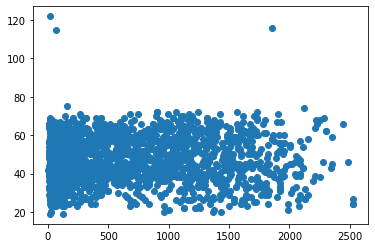

In [64]:
plt.scatter(x='total_item',y='age',data=df)
plt.show()

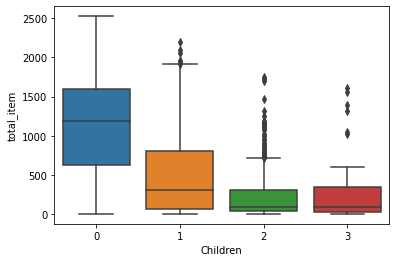

In [65]:
sns.boxplot(x='Children',y='total_item',data=df)
plt.show()

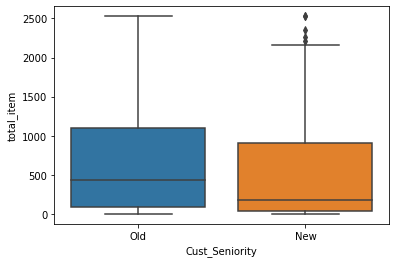

In [66]:
sns.boxplot(x='Cust_Seniority',y='total_item',data=df)
plt.show()

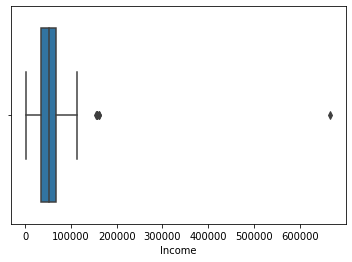

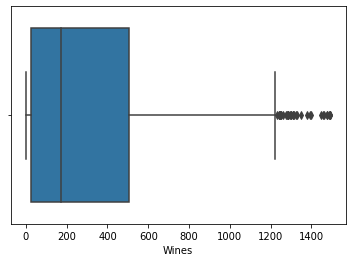

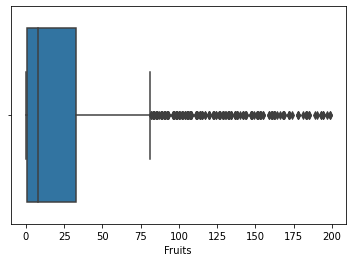

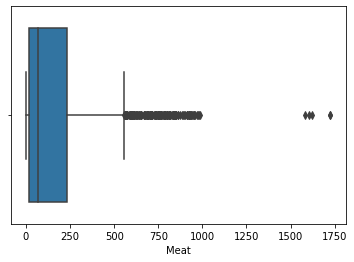

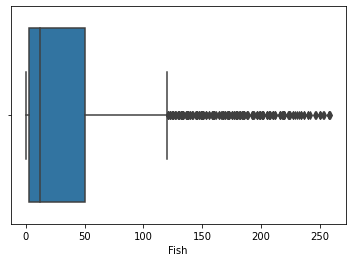

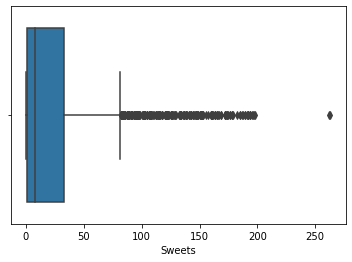

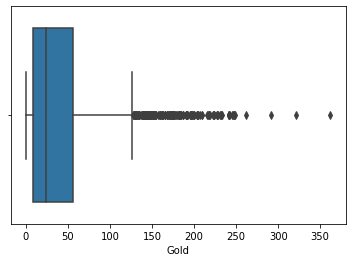

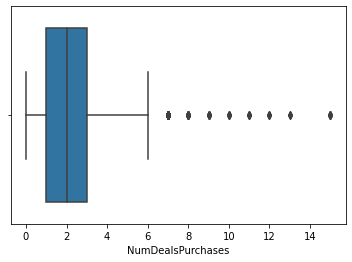

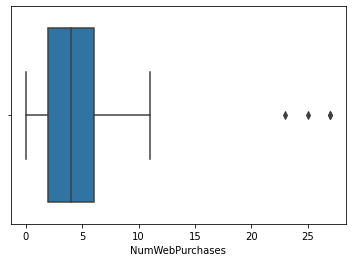

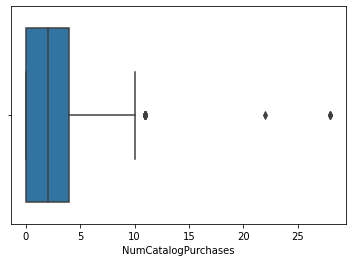

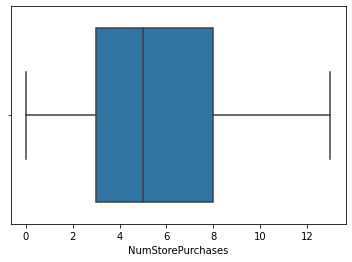

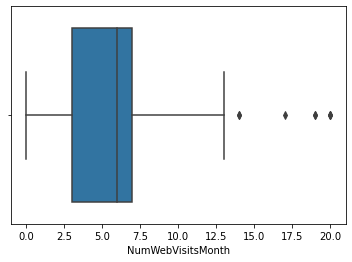

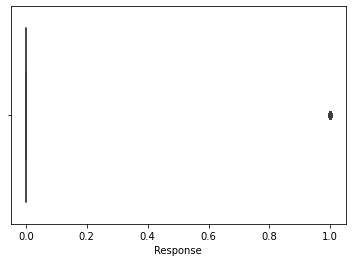

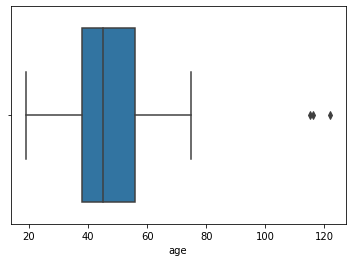

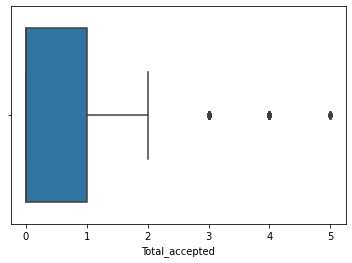

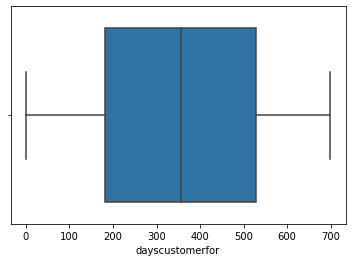

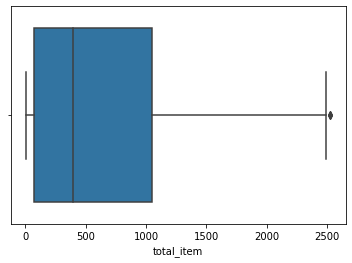

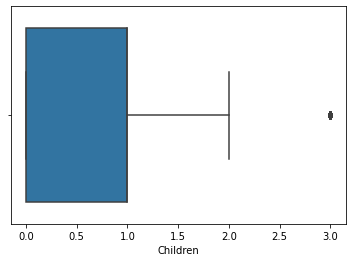

In [67]:
for i in df.columns:
    if df[i].dtype != "object":
        plt.figure(i)
        sns.boxplot(data=df, x=i)

In [68]:
df[df['Income'] > 600000] # income outlier

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,age,Total_accepted,dayscustomerfor,Cust_Seniority,total_item,Children
2233,Graduation,666666.0,9,14,18,8,1,12,4,3,1,3,6,0,38,0,392,Old,62,1


In [69]:
df[df['age'] > 100] # age outlier

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,age,Total_accepted,dayscustomerfor,Cust_Seniority,total_item,Children
192,UnderGraduation,36640.0,15,6,8,7,4,25,1,2,1,2,5,0,115,0,276,Old,65,1
239,UnderGraduation,60182.0,8,0,5,7,0,2,1,1,0,2,4,0,122,0,43,New,22,1
339,PhD,83532.0,755,144,562,104,64,224,1,4,6,4,1,0,116,1,276,Old,1853,0


In [70]:
# filtered out the outliers
df = df[df['Income'] < 600000]
df = df[df['age'] < 100]

In [71]:
df.head()

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,age,Total_accepted,dayscustomerfor,Cust_Seniority,total_item,Children
0,Graduation,58138.0,635,88,546,172,88,88,3,8,10,4,7,1,58,1,663,Old,1617,0
1,Graduation,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,61,0,113,New,27,2
2,Graduation,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,50,0,312,Old,776,0
3,Graduation,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,31,0,139,New,53,1
4,PhD,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,34,0,161,New,422,1


# handaling categorical data

In [72]:
categorical=[feature for feature in df.columns if df[feature].dtypes=='object']

In [73]:
len(categorical)

2

In [74]:
df[categorical]

,Education,Cust_Seniority
0,Graduation,Old
1,Graduation,New
2,Graduation,Old
3,Graduation,New
4,PhD,New
...,...,...
2235,Graduation,Old
2236,PhD,New
2237,Graduation,New
2238,Master,New


there are only two columns cantain categorical data so we do manualy encodeing for each

In [75]:
df['Cust_Seniority']=df['Cust_Seniority'].replace({'Old':1,'New':0})

In [76]:
df['Cust_Seniority'].head()

0    1
1    0
2    1
3    0
4    0
Name: Cust_Seniority, dtype: int64

In [77]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'UnderGraduation'], dtype=object)

In [78]:
df['Education']=df['Education'].replace({'UnderGraduation':0,'Graduation':1,'Master':2,'PhD':3})

In [79]:
df[categorical].head()

,Education,Cust_Seniority
0,1,1
1,1,0
2,1,1
3,1,0
4,3,0


In [80]:
df.head()

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,age,Total_accepted,dayscustomerfor,Cust_Seniority,total_item,Children
0,1,58138.0,635,88,546,172,88,88,3,8,10,4,7,1,58,1,663,1,1617,0
1,1,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,61,0,113,0,27,2
2,1,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,50,0,312,1,776,0
3,1,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,31,0,139,0,53,1
4,3,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,34,0,161,0,422,1


# feature selection

feature slection is one of the most important step in machine learing , in this step we are select the feature which are impacte on the Result(prediction). 

for the feature selection we have to constract heatmap it shows a corelation between each columns in the dataset

In [81]:
df.columns

Index(['Education', 'Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'age',
       'Total_accepted', 'dayscustomerfor', 'Cust_Seniority', 'total_item',
       'Children'],
      dtype='object')

In [82]:
# scaled our data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,age,Total_accepted,dayscustomerfor,Cust_Seniority,total_item,Children
0,-0.508203,0.288513,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,2.386338,1.016868,0.620456,1.529793,0.656188,1.680176,-1.264308
1,-0.508203,-0.262438,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.419052,1.273264,-0.501987,-1.191143,-1.523954,-0.962202,1.395139
2,-0.508203,0.917992,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.419052,0.333146,-0.501987,-0.206659,0.656188,0.282541,-1.264308
3,-0.508203,-1.182621,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.419052,-1.290693,-0.501987,-1.062517,-1.523954,-0.918994,0.065416
4,1.586436,0.295754,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.419052,-1.034298,-0.501987,-0.953679,-1.523954,-0.305762,0.065416


<AxesSubplot:>

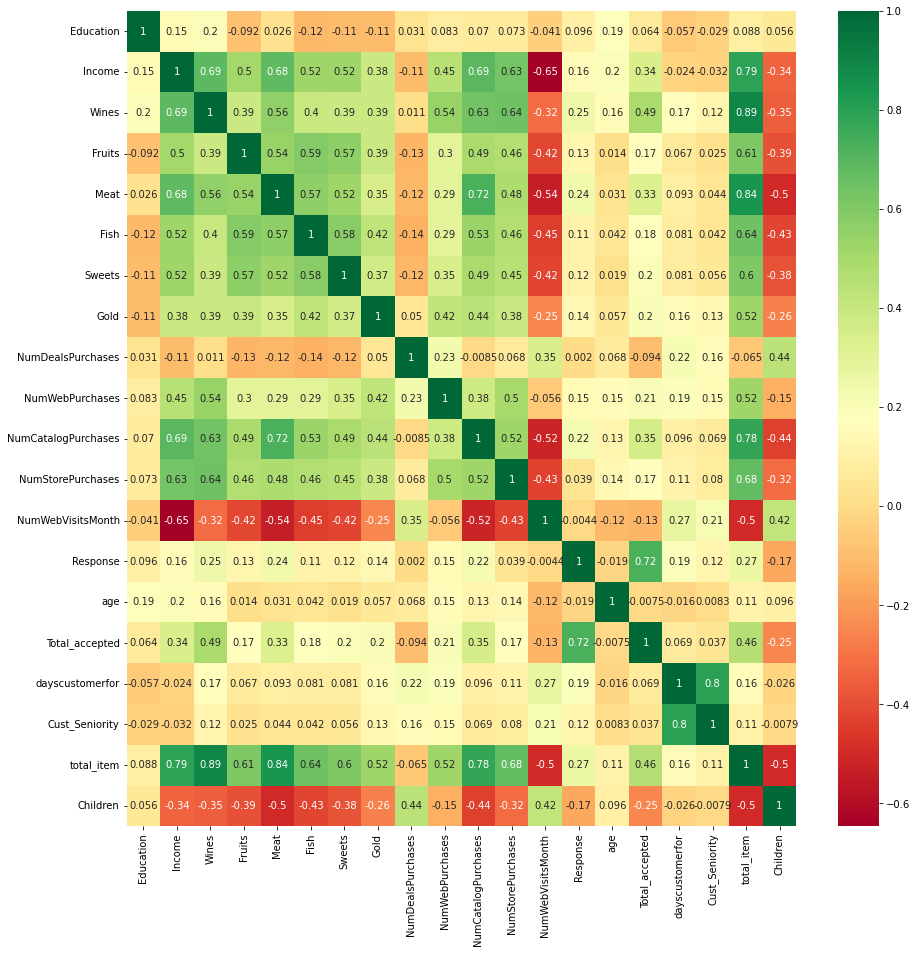

In [83]:
corelation=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In the above figure we observed some feature are more corelated and some are less corelated so we have select some feature in that . 

we have to select income,age,total_item,Education,dayscustomerfor,cust_Seniority this are all the feature is impact on the customer personality analysis . using select columns we have to form the cluster 

In [84]:
result=df[['Income','age','Education','dayscustomerfor','Cust_Seniority','Response','total_item']]

# Model Building

In [85]:
from sklearn.preprocessing import StandardScaler,normalize
scaler = StandardScaler()
classification=df[['Income','total_item','dayscustomerfor']]
X_std=scaler.fit_transform(classification)
X = normalize(X_std,norm='l2')

In [86]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

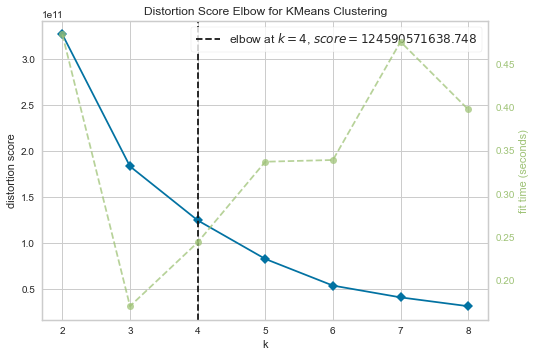

In [87]:
to_keep = ['Education', 'Income', 'dayscustomerfor', 'age',
       'Cust_Seniority', 'total_item']

elbow = KElbowVisualizer(KMeans(), k=8)
elbow.fit(df[to_keep])
elbow.show()
plt.show()

In [88]:
kmeancluster = KMeans(n_clusters=4)
df["kcluster"] = kmeancluster.fit_predict(df[to_keep])

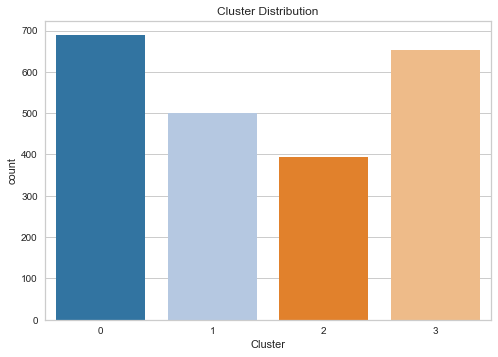

In [89]:
# we check the cluster counts
sns.countplot(data=df, x="kcluster", palette="tab20")
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.show()

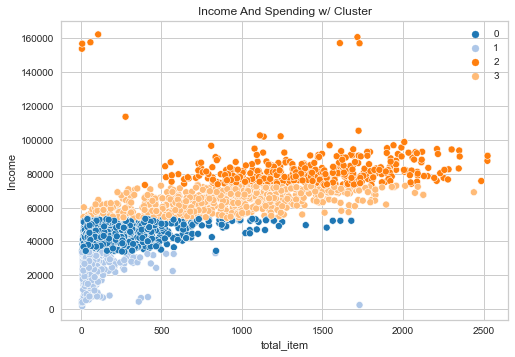

In [90]:
pl = sns.scatterplot(data = df,x=df["total_item"], y=df["Income"],hue=df["kcluster"], palette="tab20")
pl.set_title("Income And Spending w/ Cluster")
plt.legend()
plt.show()

In the above figure conclude that:                                                               
1.customer who are getting approximately more then 70000 income they spend or buying more product.this show by the cluster 2.                                     
2.customer who are getting approximately  more then 55000 income they spend or buying more product but lesser buyer then the poit 1 customer.this show by the cluster 3.                                                             
3.customer who are getting medium level income approximately 40000 or above they spend medium buyer based on there income.this show by the cluster 0.                                                                     
4.customer who are getting less income approximately 0<20000,<35000 they buy less product. this show by the cluster 1.

In [91]:
df.groupby("kcluster")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,689.0,43511.19,5804.73,33955.0,38410.00,43142.0,48789.00,53378.0
1,500.0,24177.36,7082.82,1730.0,19936.75,25304.0,30096.00,33812.0
2,394.0,82988.79,11829.01,73356.0,77068.50,80581.0,84895.75,162397.0
3,653.0,63432.39,5678.45,53537.0,58482.00,63684.0,68316.00,73170.0


# Now We have to find which product is more consumed by the customer

In [92]:
df.groupby("kcluster")["total_item"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kcluster,,,,,,,,
0,689.0,255.47,271.93,8.0,60.00,156.0,369.00,1679.0
1,500.0,77.55,113.15,5.0,31.75,51.5,80.00,1730.0
2,394.0,1424.90,457.70,6.0,1112.25,1435.0,1734.75,2525.0
3,653.0,886.34,446.85,16.0,546.00,893.0,1178.00,2440.0


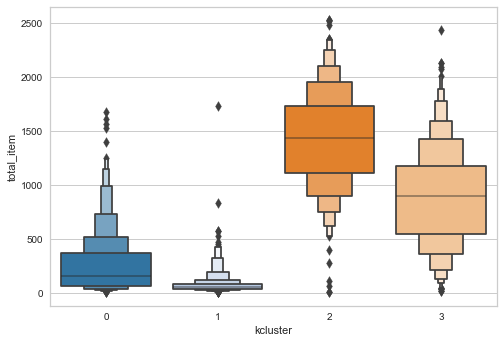

In [93]:
# we plot boxenplot
sns.boxenplot(x=df["kcluster"], y=df["total_item"], palette="tab20")
plt.show()

In above figure conculeds cluster 2 is more consumed product by the customer,then we also know more income customer buys more producte so based on the above point we concludes cluster 2 is belogs to  more income customer

In [94]:
df.groupby("kcluster")[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].mean().round(2)

,Wines,Fruits,Meat,Fish,Sweets,Gold
kcluster,,,,,,
0,137.69,8.83,53.90,14.50,9.81,30.73
1,19.32,5.78,21.82,8.37,5.80,16.46
2,659.46,64.22,470.97,91.92,67.75,70.57
3,483.42,37.48,214.03,51.36,37.06,62.99


In [95]:
df.columns

Index(['Education', 'Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'age',
       'Total_accepted', 'dayscustomerfor', 'Cust_Seniority', 'total_item',
       'Children', 'kcluster'],
      dtype='object')

In [96]:
total=df['total_item'].sum()

In [97]:
product=df[['Wines','Fruits','Meat','Fish','Sweets','Gold']]

In [98]:
per=[]
for feature in product:
    d=(df[feature].sum()/total)*100
    per.append(d)
    

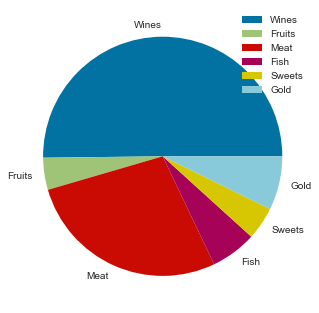

In [99]:
product=['Wines','Fruits','Meat','Fish','Sweets','Gold']
plt.pie(per,labels=product)
plt.legend()
plt.show()

Above figure conclude wines is most selling product after wines meat is the second most selling product. it consume by all the customer , we must find which product is more consumed by the good customer

In [100]:
a=[]
for i in product:
    i = pd.DataFrame({i:(df.groupby("kcluster")[i].sum() / df[i].sum() * 100).round(1)})
    a.append(i)

In [101]:
pd.concat(a, axis=1)

,Wines,Fruits,Meat,Fish,Sweets,Gold
kcluster,,,,,,
0,14.0,10.4,9.9,11.9,11.2,21.5
1,1.4,4.9,2.9,5.0,4.8,8.4
2,38.2,43.1,49.7,43.2,44.1,28.3
3,46.4,41.7,37.4,40.0,40.0,41.8


we discused above,

1.cluster 2 indiacte good customer so above data conclude good customer consume more meat product.

2.cluster 3 is also a good customer they have intrast in consumig wines more.

3.In cluster 1 customer more intrested in buying gold.


4.Cluster 0 has the least spending but they have shown some interest towards Gold comparatively.

In [102]:
df.columns

Index(['Education', 'Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'age',
       'Total_accepted', 'dayscustomerfor', 'Cust_Seniority', 'total_item',
       'Children', 'kcluster'],
      dtype='object')

In [103]:
df.groupby('kcluster')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].mean().round(2)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
kcluster,,,,,
0,2.76,3.46,1.26,4.32,6.30
1,2.03,1.98,0.46,2.94,7.03
2,1.27,5.26,6.07,8.26,2.68
3,2.73,5.66,3.78,8.05,4.56
